In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
PATH_TO_GRAPH = r'fine_tuned/ssd/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'foreign_graph.pb'
PATH_TO_LABELS = r'data/label_map.pbtxt'
NUM_CLASSES = 13

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'GreenLeft'}, 3: {'id': 3, 'name': 'GreenRight'}, 4: {'id': 4, 'name': 'GreenStraight'}, 5: {'id': 5, 'name': 'GreenStraightLeft'}, 6: {'id': 6, 'name': 'GreenStraightRight'}, 7: {'id': 7, 'name': 'Red'}, 8: {'id': 8, 'name': 'RedLeft'}, 9: {'id': 9, 'name': 'RedRight'}, 10: {'id': 10, 'name': 'RedStraight'}, 11: {'id': 11, 'name': 'RedStraightLeft'}, 12: {'id': 12, 'name': 'Yellow'}, 13: {'id': 13, 'name': 'off'}}


In [6]:
# PATH_TO_IMGS = r'data/dataset_test_rgb/rgb/test/jpeg'
PATH_TO_IMGS = r'data/udacity_testarea_rgb/'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
IMAGE_SIZE = (12, 8)
random.shuffle(TEST_IMGS)

SCORES
[[0.9858671  0.9751291  0.9637064  0.9621814  0.9527424  0.9488475
  0.9478802  0.94447684 0.9399092  0.93981105 0.9393903  0.9379624
  0.93756115 0.92503655 0.9246628  0.92196345 0.91611195 0.91541535
  0.90732706 0.906721   0.9013531  0.90013325 0.8993414  0.89881575
  0.895598   0.89506304 0.8948446  0.89272803 0.8866376  0.8854589
  0.8850635  0.88326293 0.8823689  0.88111    0.88052654 0.8789658
  0.87853134 0.8743048  0.87305033 0.8723019  0.8718149  0.86921734
  0.86803347 0.867139   0.8660477  0.8654663  0.8652232  0.8630242
  0.8610085  0.858719  ]]
CLASSES
[[ 3. 11.  7.  3.  2.  4.  5.  3. 10.  2. 10. 10.  4. 11. 11.  4.  6.  6.
   7.  3. 10. 13.  8. 13. 10. 12.  3.  2.  1. 13.  4. 11. 13.  6.  7.  8.
  13.  9.  5.  2. 11.  2.  9.  6. 12.  1.  5.  8.  7.  8.]]


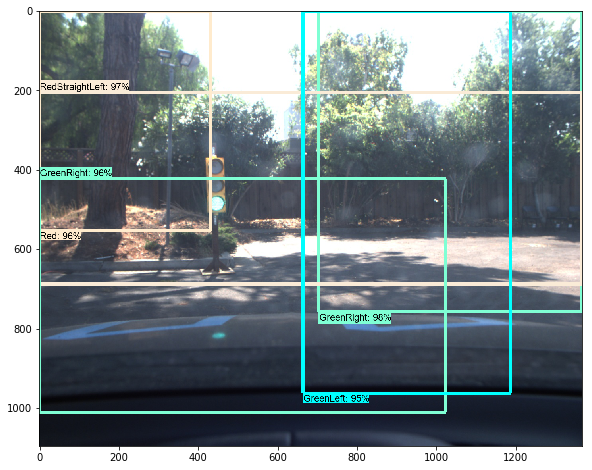

SCORES
[[0.9845642  0.9820509  0.9741657  0.9617086  0.9589238  0.951565
  0.94846547 0.9429263  0.939349   0.93693733 0.93442833 0.93389434
  0.9333081  0.93020356 0.9275431  0.9242633  0.9154526  0.9119201
  0.91115355 0.90577483 0.90255404 0.90208185 0.8967574  0.89615315
  0.89614767 0.89509016 0.8949988  0.89304936 0.89019006 0.88859594
  0.8874739  0.88705    0.8859877  0.88503784 0.8830334  0.88202804
  0.8816253  0.88068193 0.8795182  0.8794235  0.87861246 0.878115
  0.87722355 0.8768167  0.87296957 0.8728344  0.8716759  0.8709286
  0.8692883  0.86794806]]
CLASSES
[[11. 13.  6. 10.  3. 10. 11.  4. 10. 10.  8.  5.  4.  4.  9.  1.  3. 10.
   6. 12.  3. 11.  7.  1. 12.  2. 12.  2.  8. 11. 13.  2. 11.  9.  7.  8.
   2.  9.  6.  6.  6.  8. 13.  2.  7.  4. 13.  4.  8.  5.]]


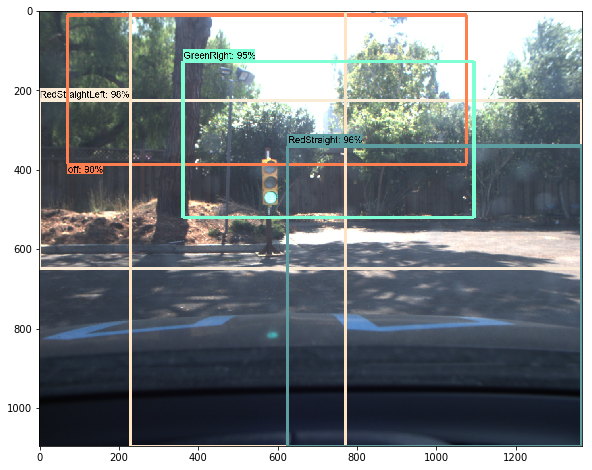

SCORES
[[0.9928895  0.97146803 0.9651472  0.9571239  0.95673907 0.95314294
  0.9496767  0.9487977  0.9478018  0.9474965  0.9433639  0.93822867
  0.92824626 0.9272512  0.9247591  0.92418253 0.9238683  0.92343754
  0.922395   0.921874   0.9207836  0.92043704 0.9203876  0.92028475
  0.91972417 0.9180203  0.91794056 0.9176045  0.9172141  0.91462374
  0.9057651  0.9043674  0.9026833  0.9015811  0.90015864 0.8954661
  0.8926805  0.8897651  0.8881164  0.88409805 0.8840605  0.8804526
  0.88004017 0.8780073  0.87699085 0.8742053  0.8739438  0.8692661
  0.869064   0.8686733 ]]
CLASSES
[[ 6.  3. 13.  6.  4.  2.  2.  9.  4.  3.  3. 11. 10.  4.  9.  4. 10.  2.
   5. 10.  3.  1. 10. 10.  1.  3.  9.  2. 12. 11. 13.  7. 12. 12.  1. 11.
   6.  5.  4. 12.  8. 11. 11. 12.  2. 13. 13.  6.  5.  7.]]


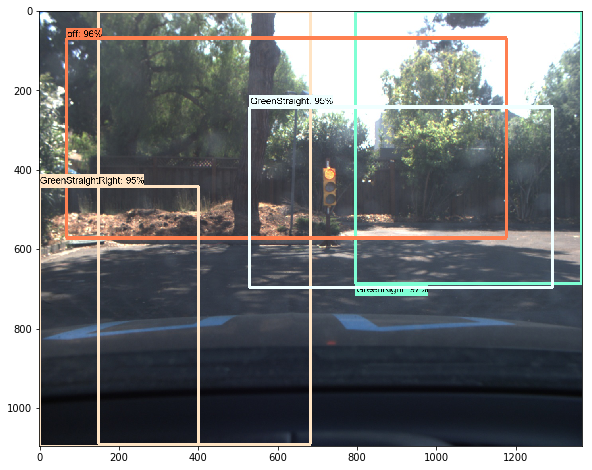

SCORES
[[0.9826675  0.9823225  0.9749204  0.9733656  0.96960026 0.9658386
  0.9578499  0.95652056 0.95313543 0.9465109  0.9435047  0.94047034
  0.940417   0.94036186 0.9388122  0.9356224  0.93501055 0.9343123
  0.93284875 0.9315041  0.93108094 0.93024015 0.92959744 0.9283751
  0.9259394  0.9201286  0.9176436  0.9158387  0.90965223 0.9094036
  0.9081314  0.90783346 0.8973641  0.8957273  0.8953014  0.894809
  0.8936378  0.8914255  0.8893154  0.88742375 0.88585544 0.883041
  0.8811897  0.87822515 0.873526   0.8720431  0.870694   0.8686855
  0.8658398  0.8613947 ]]
CLASSES
[[ 6. 13.  5.  2.  4.  4. 12.  3. 10. 11. 11.  1.  3.  2.  6. 11.  4. 13.
  10.  7.  5.  4.  1.  7.  9.  3.  9.  2.  3. 10.  2.  1. 10. 11.  2. 13.
  10.  1.  5.  4.  8. 11.  6. 12. 12.  3.  7.  6.  9. 12.]]


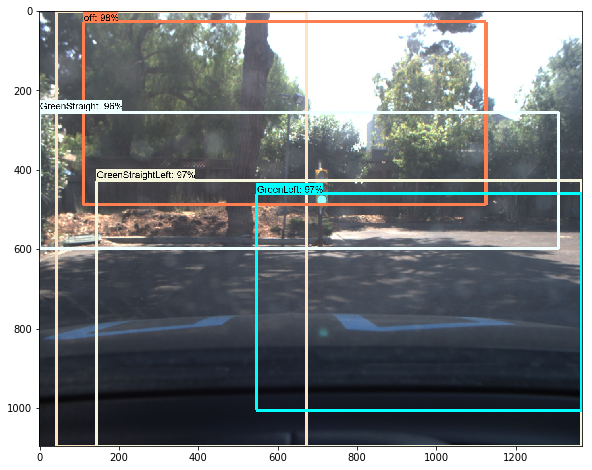

SCORES
[[0.94969505 0.9385719  0.93637216 0.9341946  0.920921   0.9191632
  0.9014673  0.8992766  0.8990359  0.8935518  0.8905002  0.8877963
  0.8772852  0.8772141  0.8770623  0.8675799  0.8669763  0.8658024
  0.86409175 0.8597831  0.8591205  0.85760057 0.857021   0.8569496
  0.8568682  0.85653985 0.8554145  0.8539326  0.8531027  0.851681
  0.84984666 0.84739655 0.8472171  0.8456738  0.84360576 0.84277254
  0.84264374 0.84228444 0.8400007  0.83914477 0.8371279  0.8367991
  0.8365377  0.8364562  0.8322551  0.8321684  0.8311484  0.82871133
  0.82764375 0.8276303 ]]
CLASSES
[[ 3.  4.  8.  4. 11.  6.  6.  8.  5. 11.  7. 12.  5. 11.  6.  8.  4. 13.
   1.  4. 12.  8.  4. 11. 11.  2.  3.  7.  3.  2.  2. 12.  8.  6.  1.  1.
   3.  1.  6.  1. 10. 10.  3.  5. 12.  7.  7.  9. 10. 10.]]


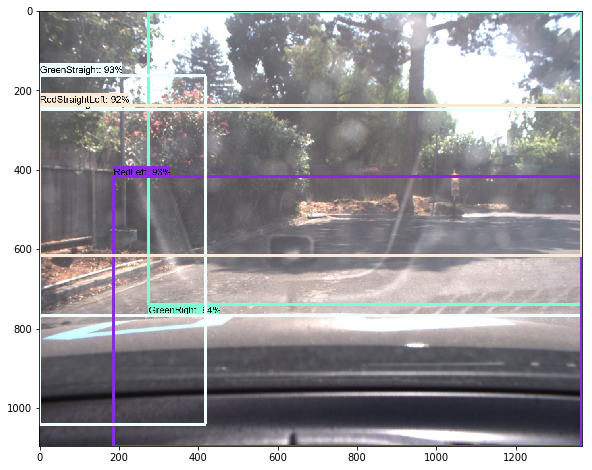

SCORES
[[0.9770718  0.9749161  0.9748857  0.96826375 0.9574031  0.9508665
  0.9488681  0.9479961  0.94656485 0.9460027  0.9424891  0.9406943
  0.94035524 0.93862575 0.9352818  0.9294085  0.92262733 0.92113966
  0.9184781  0.9169197  0.9166753  0.91525245 0.91397375 0.91368127
  0.91355807 0.91277814 0.9120103  0.91129243 0.91022134 0.9071755
  0.90715545 0.90545315 0.9000033  0.89871264 0.8941637  0.89366776
  0.89246273 0.89093244 0.8908064  0.88993835 0.88930887 0.8833222
  0.8825801  0.8820405  0.881745   0.87829226 0.87688684 0.876449
  0.8749388  0.86772794]]
CLASSES
[[ 3. 13.  8. 12. 11. 11.  2.  5.  6.  2.  4.  5.  7.  8.  3. 10. 11.  2.
  10.  3.  7.  5. 10.  2. 13.  3. 10.  4.  2. 12.  7. 10.  9. 13.  4. 12.
   8.  8.  8.  6. 11.  4. 12.  5. 12. 11. 13.  3.  6.  6.]]


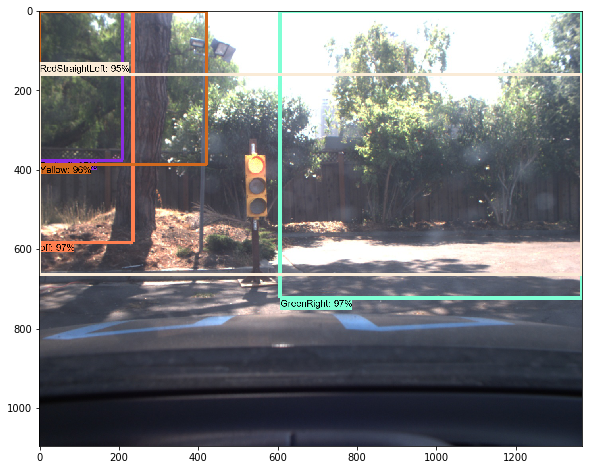

SCORES
[[0.9865812  0.98381054 0.9790917  0.97767794 0.96721774 0.9636303
  0.9582254  0.95732826 0.95437163 0.95351595 0.9500007  0.9492214
  0.9465603  0.9460248  0.9397599  0.93899894 0.93297803 0.9291934
  0.9255335  0.9204877  0.91914713 0.9185398  0.91304845 0.91253984
  0.91081804 0.9076748  0.905081   0.9049275  0.90319085 0.9021712
  0.90190727 0.89455116 0.8936421  0.88945043 0.8853386  0.8794435
  0.8772976  0.8752815  0.87524223 0.87457633 0.8743823  0.87227404
  0.8719237  0.8717109  0.8711809  0.8702936  0.86950654 0.86943114
  0.8644752  0.8630601 ]]
CLASSES
[[13. 13.  3.  8.  2.  8. 12.  8.  2.  7.  7. 12.  6. 12. 11.  4.  9.  9.
  11.  3. 10. 10.  9. 11.  2.  5.  8. 12. 13. 10.  4.  6.  6.  2.  6.  8.
   9.  4.  5. 10.  4.  5.  9. 10. 11. 13.  1.  2.  4. 13.]]


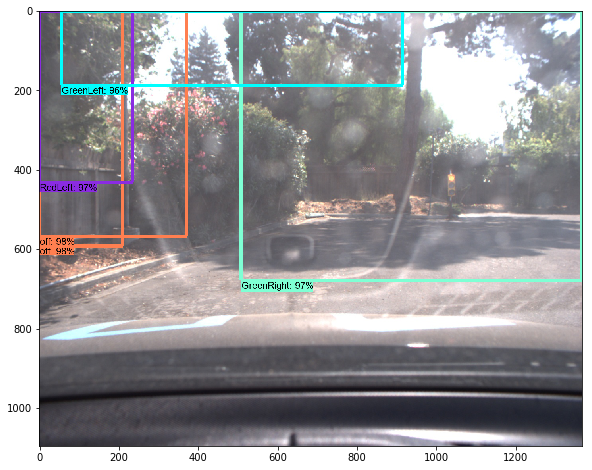

SCORES
[[0.9867877  0.9866239  0.9569578  0.9440798  0.93959063 0.9200118
  0.91869485 0.9174074  0.9152887  0.9077735  0.90595716 0.9017307
  0.8991363  0.8989354  0.89793646 0.8953297  0.89455765 0.8927138
  0.88978016 0.8852688  0.8849131  0.8840123  0.8836408  0.88153696
  0.8812872  0.8791962  0.87801445 0.87676245 0.8732718  0.87206024
  0.871315   0.87120825 0.8696041  0.8680043  0.867804   0.8665518
  0.86357594 0.8628061  0.8585137  0.85779893 0.8536256  0.85291845
  0.8518323  0.85163206 0.8492034  0.8460651  0.8456604  0.84508145
  0.84286755 0.8421597 ]]
CLASSES
[[ 3.  3.  6. 11.  6.  8. 10.  8. 10.  2. 10.  3.  2. 10.  3. 11. 10. 11.
   7.  6.  7.  5. 11.  5. 12.  3.  9.  1. 13.  9.  9. 13.  1. 12.  5.  8.
   2. 13.  5.  2.  8.  4.  8.  4.  1.  2.  6.  4. 13.  1.]]


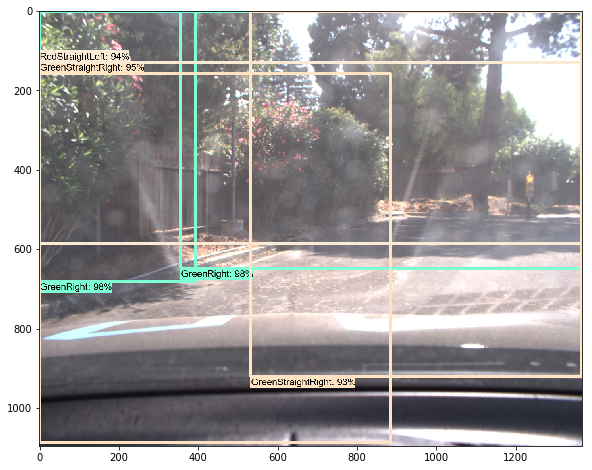

SCORES
[[0.9756953  0.967451   0.9626007  0.9579342  0.93831223 0.93751913
  0.9335539  0.9262415  0.92194206 0.915278   0.91030264 0.9013091
  0.8997577  0.89956826 0.89654666 0.8958196  0.89553374 0.8954898
  0.8954853  0.8948563  0.894072   0.8938335  0.8900664  0.8869144
  0.8846671  0.88416696 0.8828769  0.88274133 0.8810862  0.8782074
  0.876471   0.8760678  0.8755989  0.87436664 0.87081873 0.87014776
  0.87008554 0.86953056 0.8678487  0.86580247 0.8651793  0.8648367
  0.86450654 0.8628524  0.8624622  0.86076874 0.86015433 0.85689145
  0.85406023 0.85186815]]
CLASSES
[[ 4.  7.  5.  3. 11. 12. 11.  2. 13. 10.  3.  3.  2.  5.  9.  9. 10. 10.
   6. 11.  4. 12. 10.  8.  9.  6.  7.  8.  3.  8. 13.  1. 10.  4.  2.  4.
  11.  4. 13.  7.  1.  8.  7.  8.  9. 12.  7.  3.  5.  6.]]


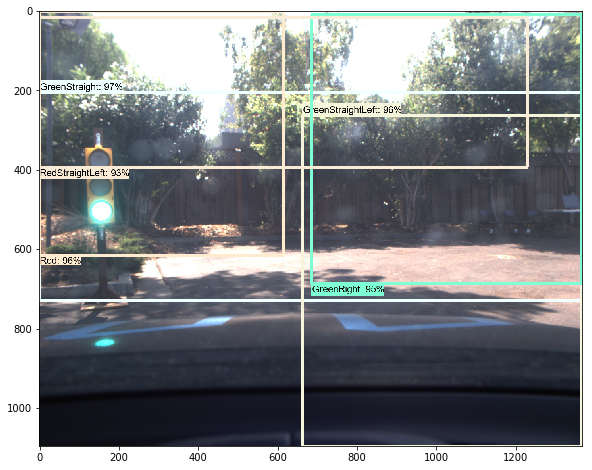

SCORES
[[0.9670128  0.959938   0.95644116 0.9401603  0.93068784 0.9216366
  0.9189513  0.91803336 0.9172745  0.91031367 0.9088481  0.90297705
  0.89901286 0.8949217  0.8914062  0.8912943  0.89084214 0.8893163
  0.88078976 0.87981313 0.8779617  0.8779322  0.87727535 0.87659544
  0.87144095 0.8691703  0.8676008  0.8639331  0.8610272  0.86098254
  0.85918903 0.8553949  0.8546928  0.85358775 0.8525512  0.8498299
  0.84741545 0.84598196 0.8449667  0.84276366 0.8402448  0.8387117
  0.8386206  0.83845115 0.8377602  0.83766603 0.8351338  0.834494
  0.8343028  0.8337753 ]]
CLASSES
[[ 3. 11. 11. 12.  5.  6.  3.  2.  7. 11.  7.  3.  3.  6.  9.  5. 10. 10.
  12.  6.  4.  3. 13.  6. 12.  1. 10.  6.  4. 13.  1.  2.  9.  9. 10. 10.
   2.  8. 11.  9.  1. 13.  8.  1. 12. 11. 13.  5.  8.  5.]]


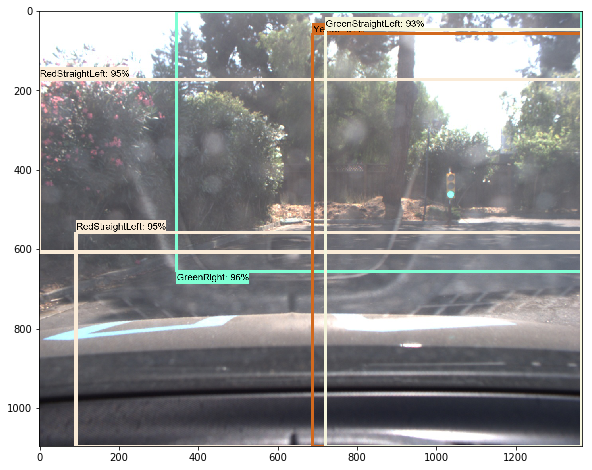

SCORES
[[0.95871174 0.9260822  0.9255473  0.911218   0.90187275 0.9002937
  0.89780945 0.89765954 0.8896757  0.88912404 0.8863476  0.885661
  0.8842323  0.88388175 0.87583697 0.865613   0.86267674 0.8626443
  0.8595558  0.85946953 0.8579222  0.85709584 0.8566647  0.85286987
  0.852445   0.85243195 0.85111713 0.8507219  0.8492403  0.8483997
  0.84617907 0.84527117 0.8422802  0.8415058  0.8411236  0.8381619
  0.8368673  0.83680975 0.8348203  0.8337305  0.8328317  0.83272773
  0.8327277  0.83060884 0.82898074 0.82875496 0.8270903  0.8264194
  0.82437325 0.8214081 ]]
CLASSES
[[11. 13. 10.  5.  3. 11.  3.  3. 13.  3. 11. 12. 11. 13.  2. 11.  2.  9.
  10.  4.  1. 10. 10.  7.  3.  2. 12.  7. 13.  7.  1.  8. 13. 10.  8.  9.
   8. 12.  9.  7.  8.  8.  5.  4. 12.  2.  2.  1.  5.  1.]]


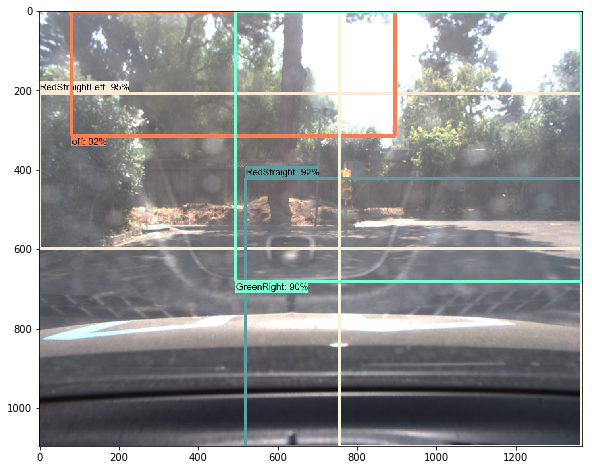

In [7]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores)
            print('CLASSES')
            print(classes)
#             print('BOXES')
#             print(boxes)
#             print('NUM')
#             print(num)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break